<a href="https://colab.research.google.com/github/Eric-BR2001/DataScience/blob/master/Quarentena_Aula_1(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importação dos dados (usei o github do instrutor por praticidade)
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [235]:
#Explorando a tabela 'avaliacoes'
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [236]:
#Explorando a tabela 'filmes'
filmes.head()
#Vou agrupar o 'filmes' com a média dos filmes
filmes_com_media = filmes.join(media_filmes,on='movieId')
filmes_com_media

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [237]:
media_filmes = avaliacoes.groupby('movieId')['rating'].mean()
media_filmes.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [238]:
#DESAFIO 1
# CRIEI UMA VAREDURA PARA VERIFICAR SE REALMENTE TINHA 18 FILMES SEM NOTAS 
# E DEPOIS CRIEI UM DF CONTENDO TODAS AS INFORMACOES 
sem_nota=filmes_com_media.sort_values("rating").isnull().sum().sum()
print("O total de filmes sem nota é de:",sem_nota)
print("Estes Filmes nao possuem nota:")
filmes_nao_avaliados = filmes[~filmes['movieId'].isin(media_filmes.index)]
titulo_filmes_nao_avaliados = filmes_nao_avaliados.title
titulo_filmes_nao_avaliados

O total de filmes sem nota é de: 18
Estes Filmes nao possuem nota:


816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: title, dtype: object

In [239]:
#DANDO UM JOIN PARA CUMPRIR O PROXIMO DESAFIO
filmes_com_media = filmes.join(media_filmes,on='movieId')
filmes_com_media

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [240]:
#DESAFIO 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.
filmes_com_media.columns = ["FilmeId", "Titulo", "Generos","Nota_média"]
filmes_com_media

,FilmeId,Titulo,Generos,Nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [241]:
#Desafio 3: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.
n_avaliacoes = avaliacoes.groupby('movieId').size()
n_avaliacoes.name = 'Avaliacoes'
filmes_com_media = filmes_com_media.join(n_avaliacoes,on='FilmeId')
filmes_com_media


,FilmeId,Titulo,Generos,Nota_média,Avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


In [242]:
#Desafio 4 
#Arredondar as médias (coluna de nota média) para duas casas decimais.
filmes_com_media["Nota_média"] = round(filmes_com_media["Nota_média"],2)
filmes_com_media

,FilmeId,Titulo,Generos,Nota_média,Avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


In [243]:
# DESAFIO 5
# Descobrir os generos dos filmes (quais são eles, únicos).
Separador_de_genero= filmes_com_media
Separador_de_genero['Generos'] = Separador_de_genero.Generos.str.split("|",expand=True,)
Separador_de_genero.Generos.unique()


array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical',
       'War', '(no genres listed)'], dtype=object)

In [244]:
# Desafio 6
# Contar o número de aparições de cada genero.
Separdor_de_genero.Generos.value_counts()

Comedy                2779
Drama                 2226
Action                1828
Adventure              653
Crime                  537
Horror                 468
Documentary            386
Animation              298
Children               197
Thriller                84
Sci-Fi                  62
Mystery                 48
Fantasy                 42
Romance                 38
(no genres listed)      34
Western                 23
Musical                 23
Film-Noir               12
War                      4
Name: Generos, dtype: int64

In [245]:
print("O total de generos é de",Separdor_de_genero.Generos.value_counts().sum())
print("Caso queira manualmente",2779+2226+1828+653+537+468+386+298+197+84+62+48+42+38+34+23+23+12+4)

O total de generos é de 9742
Caso queira manualmente 9742


In [246]:
# Desafio 7 
# Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.
from matplotlib import pyplot as plt
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.show()

<Figure size 1440x1080 with 0 Axes>

<BarContainer object of 19 artists>

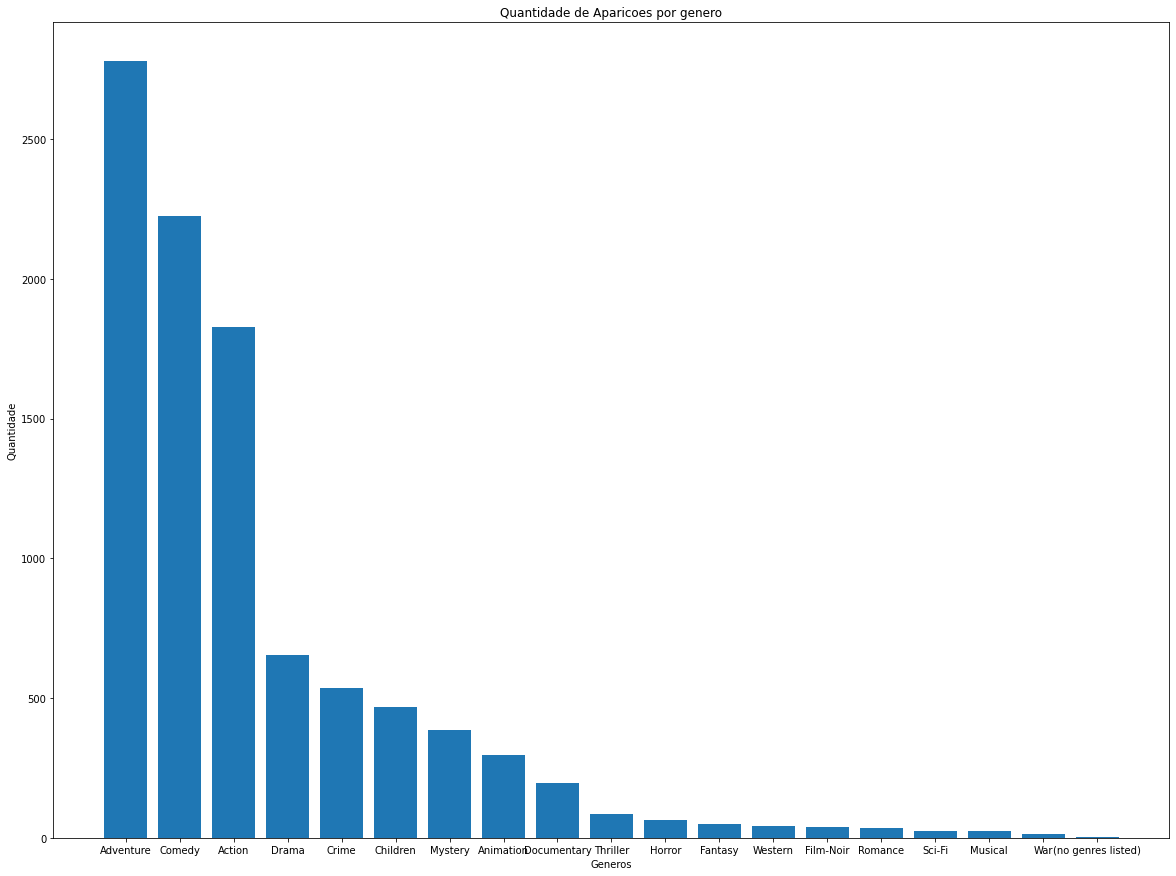

In [247]:
plt.title("Quantidade de Aparicoes por genero")
plt.rcParams['figure.figsize']=(20,15)
plt.xlabel("Generos")
plt.ylabel("Quantidade")
plt.bar(Separdor_de_genero.Generos.unique(),Separdor_de_genero.Generos.value_counts())